## Todo
- ### Set this THING to RGB as a standerd 
- Get black objects
    - get all boxes 
    - cap them off by size
    - **OR**
    - get them by the HSV value
    - get all corners and create boxes search for black objects by size
- Test System Robustness

In [244]:
%matplotlib inline

import cv2
import time
import imutils
import PIL.Image
import numpy as np
import IPython.display
from pprint import pprint
import matplotlib.pyplot as plt

# set video quality to low 
#BGR not RGB
a=cv2.VideoCapture("good2.webm") #btw the colors are inverted along the R and B
ret,frame=a.read()

('Distance top 2 points:', 650.0)
('Distance bottom 2 points:', 895.0)


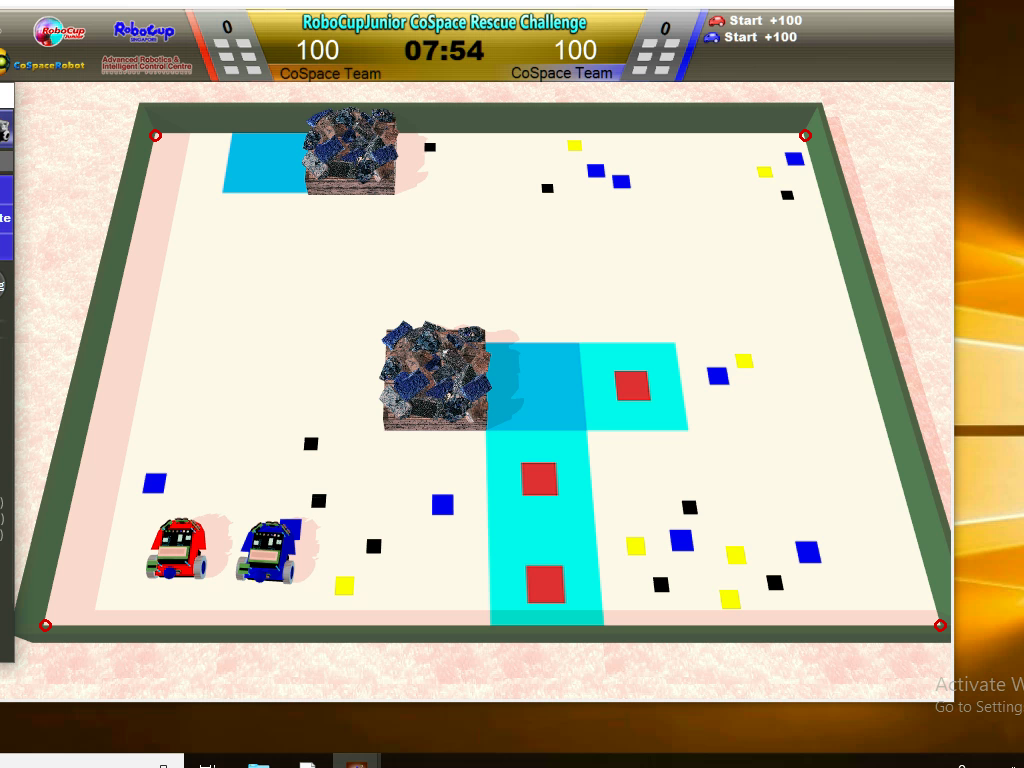

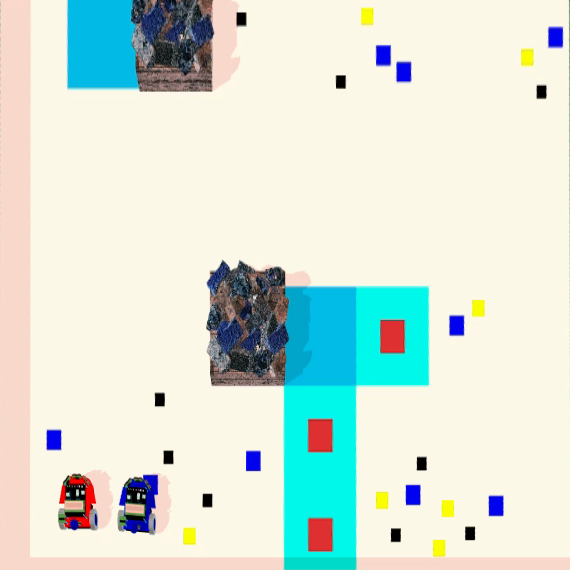

In [245]:
'''Useful for undrestanding image coordinate frames'''
fc=frame.copy()
pt_tl = [155,135]
cv2.circle(fc,tuple(pt_tl),5,(200,0,0),2)
pt_tr = [805,135]
cv2.circle(fc,tuple(pt_tr),5,(200,0,0),2)
d_top=np.linalg.norm(np.array(pt_tr)-np.array(pt_tl))
print("Distance top 2 points:",d_top)

pt_br = [940,625] # bottom right
cv2.circle(fc,tuple(pt_br),5,(200,0,0),2)
pt_bl = [45,625] # bottom left
cv2.circle(fc,tuple(pt_bl),5,(200,0,0),2)
d_bottom=np.linalg.norm(np.array(pt_br)-np.array(pt_bl))
print("Distance bottom 2 points:",d_bottom)

showarray(fc)
w,h=570,570
pts1 = np.float32([pt_tl,pt_tr,pt_bl,pt_br])#[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])
M = cv2.getPerspectiveTransform(pts1,pts2)
frame = cv2.warpPerspective(frame,M,(w,h))
showarray(frame)

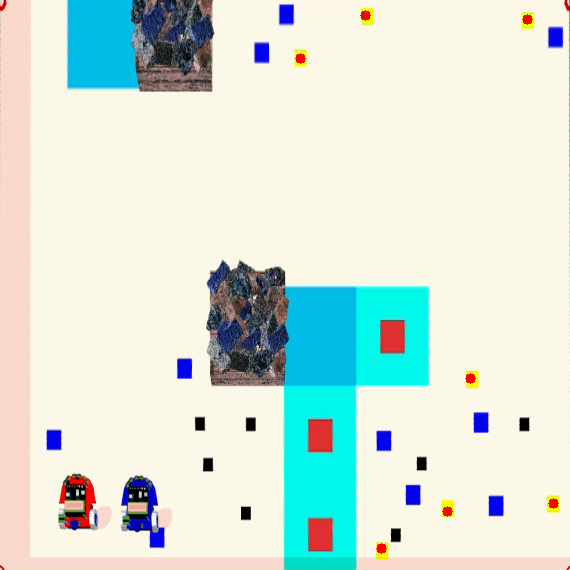

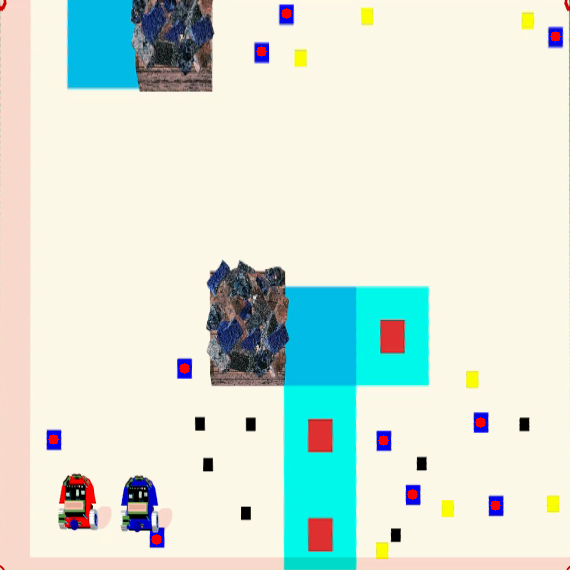

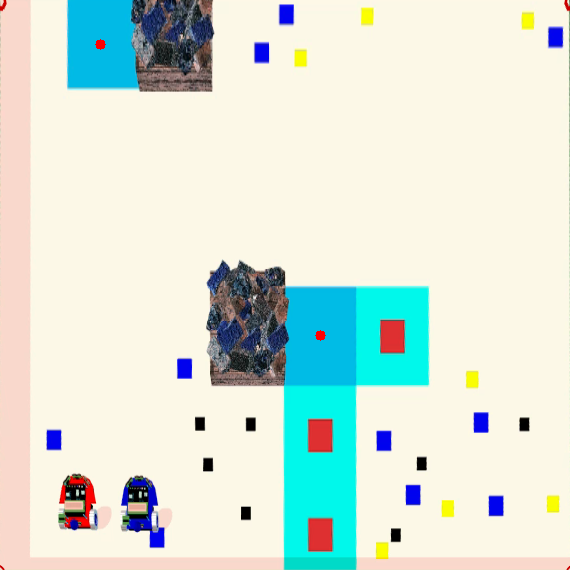

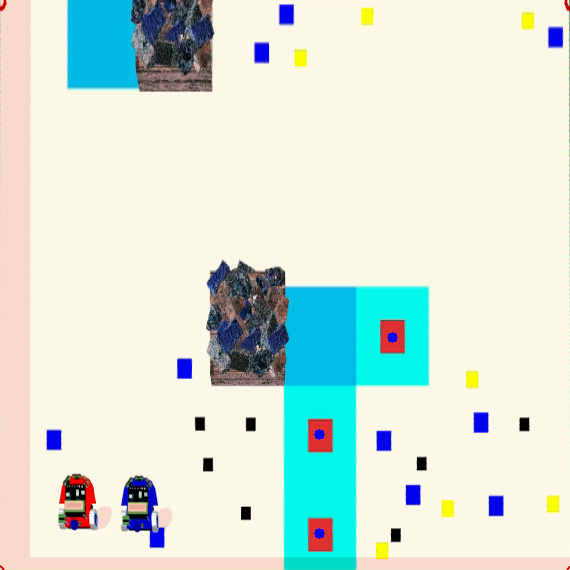

In [235]:
'''Detect Yellow Objects'''
res,mask=get_color(frame,[255,255,0],[30,30,0])
viz_box(frame,get_box_cords(mask,7,50))

'''Detect Blue'''
res,mask=get_color(frame,[0,0,255],[0,0,10])
viz_box(frame,get_box_cords(mask,7,100))

'''Detect Deposit'''
res,mask=get_color(frame,[0, 188, 230],[0, 150, 200])
viz_box(frame,get_box_cords(mask,150,500))

'''Detect Traps!'''
res,mask=get_color(frame,[255,0,0],[10,0,0])
viz_box(frame,get_box_cords(mask,10,500),c=(0,0,255))

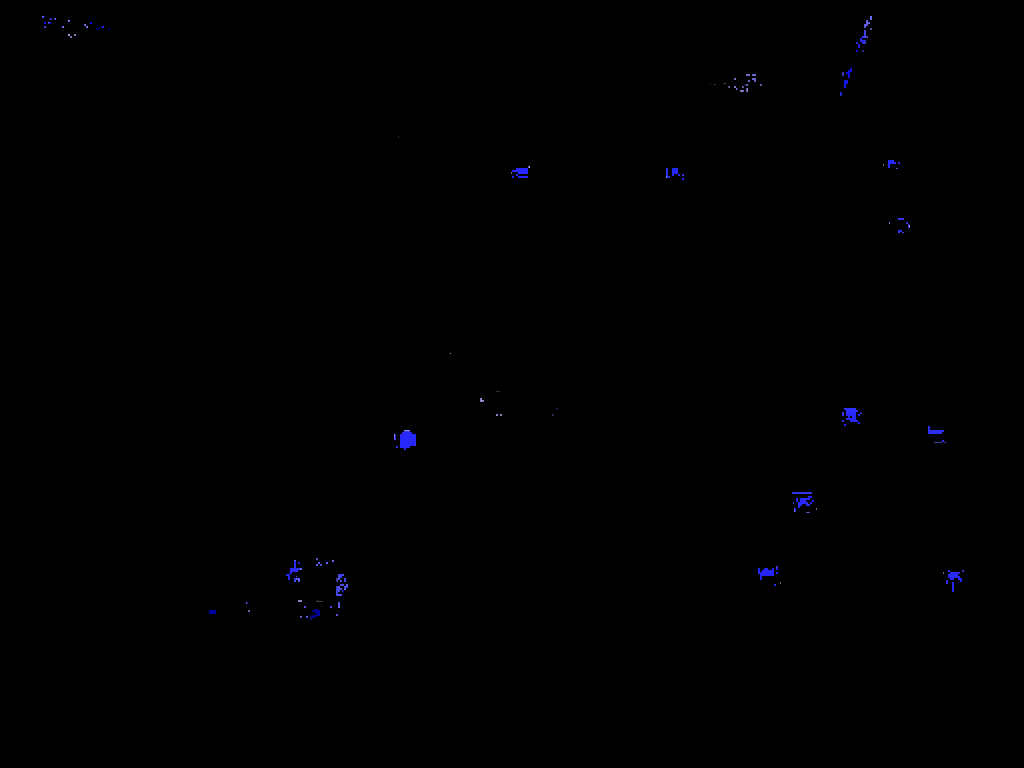

In [179]:
'''Get Blue Robot and Blue Objects'''
showarray(get_color(frame,[0,0,255],[0,0,30]))

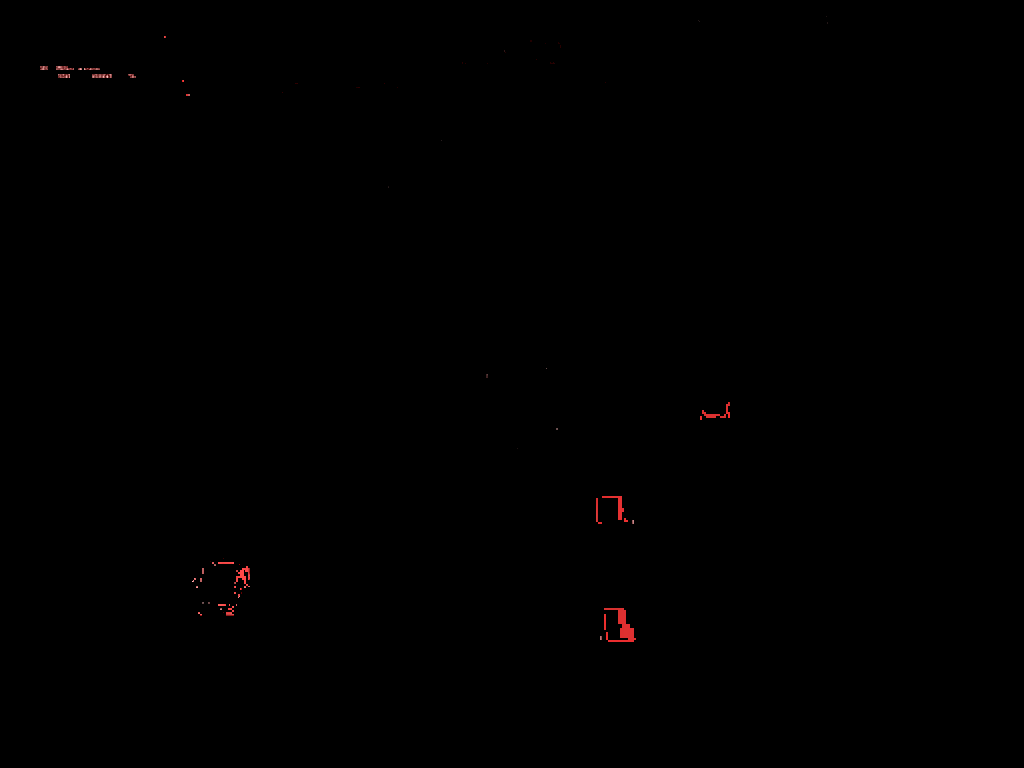

In [177]:
'''Get red Robot and red Objects'''
showarray(get_color(frame,[255,0,0],[30,0,0]))

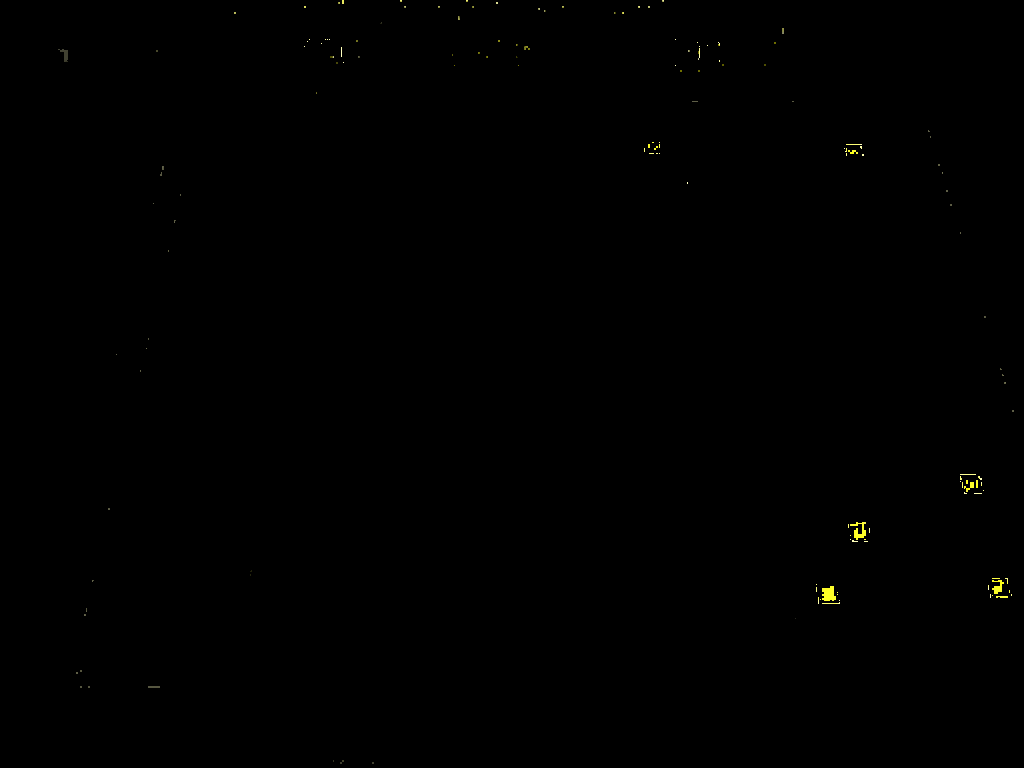

In [178]:
'''Get yellow Objects'''
showarray(get_color(frame,[255,255,0],[30,30,0]))

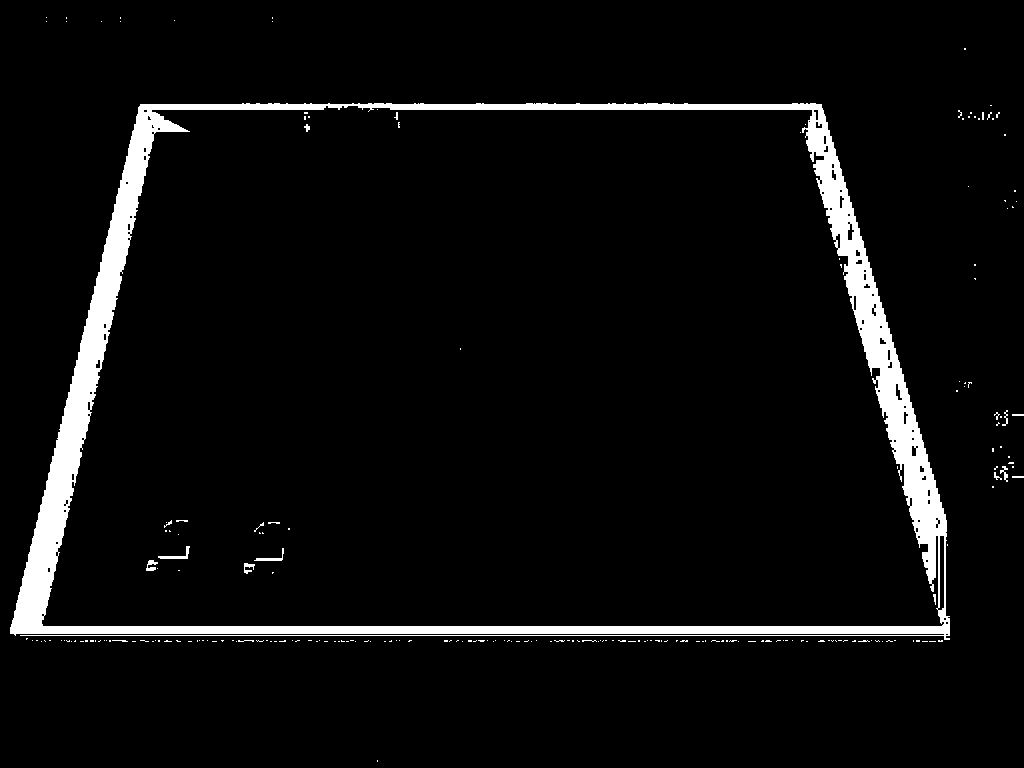

In [89]:
showarray(get_color(frame,[180, 255, 50],[0,30,0])[1])

In [66]:

def create_blank(width, height, rgb_color=(0, 0, 0)):
    """
    https://gist.github.com/navenduagarwal/95269ee19462e07edb2b4704116d0c5d
    Create new image(numpy array) filled with certain color in RGB
    """
    # Create black blank image
    image = np.zeros((height, width, 3), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color

    return image

def showcolors(up,low):
    #create_blank BGR not RGB
    up_img=create_blank(100,100,rgb_color=(up[2],up[1],up[0]))
    low_img=create_blank(100,100,rgb_color=(low[2],low[1],low[0]))
    showarray(np.vstack([up_img,low_img]))


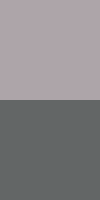

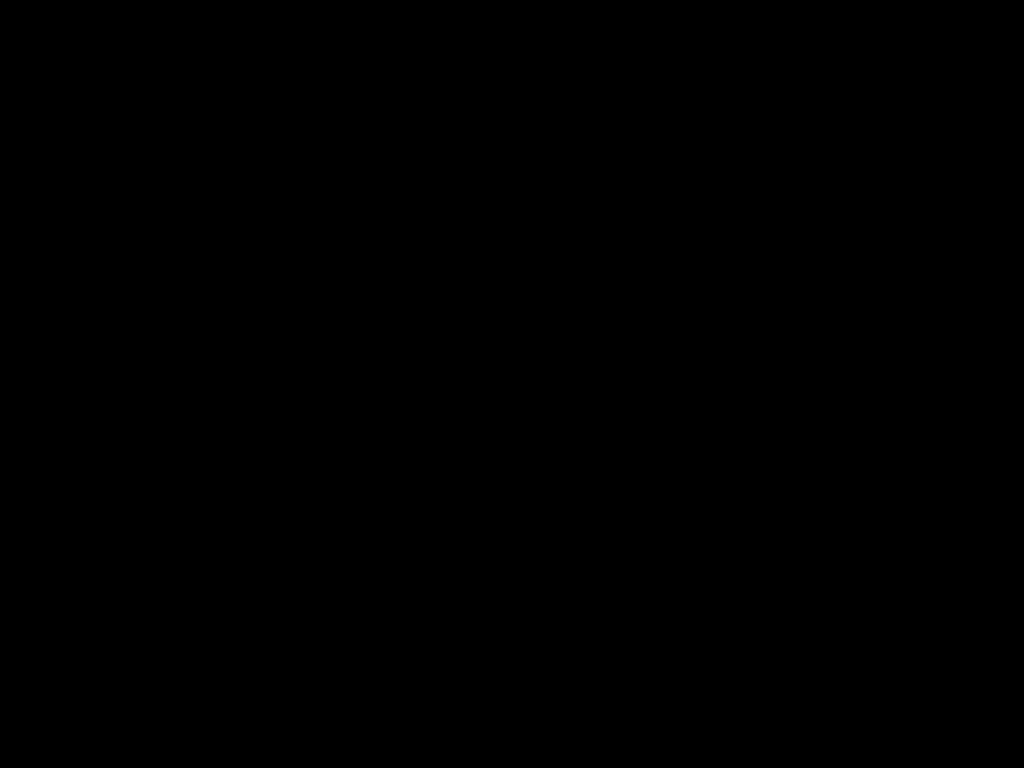

In [157]:

'''
im2, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    lc=frame.copy()
    x,y,w,h = cv2.boundingRect(cnt)
    #print(w)
    if not isWithinRange(w,30,20):
         continue
    print("Object {0}:({1},{2}) w:{3} h:{4} ".format(i,x,y,w,h))
    cv2.drawContours(lc, [cnt], -1, (0,255,0), 3)
    i+=1
    #showarray(lc)
'''
'''Get Robot'''
#rgb(229, 172, 152)
#rgb(111, 125, 68)
#showarray(get_color(frame,[230, 173, 153],[210, 153, 130])[0])

#rgb(227, 172, 152)
#rgb(229, 171, 153)


#rgb(229, 171, 154)
#rgb(247, 190, 175)


#[218 168 150]
#[255 194 178]

#sucks but better also detects right edge might be useful
#low=[230,168,120]
#up=[255,194,178]


low=[ 99 ,102 ,102]
up=[173 ,165 ,169]

#[0,0,255]
#[0,0,20]

res,mask=get_color(frame,up,low)
showcolors(up,low)
showarray(mask)


#showarray(frame)

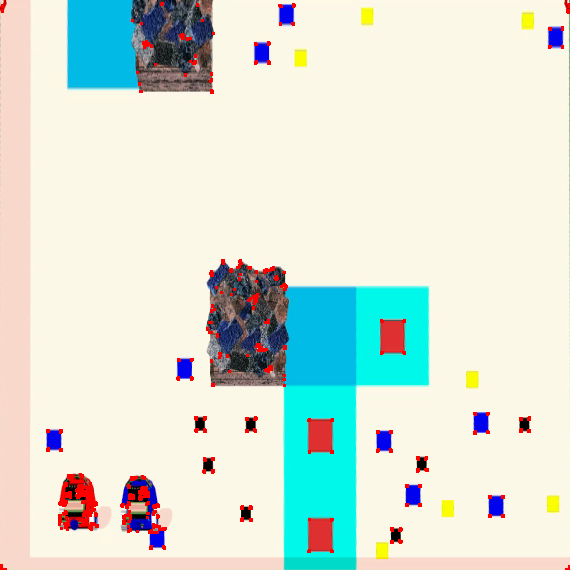

In [240]:
"Corner detection"
img=frame.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]
showarray(img)

In [239]:
points

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [154]:
a=cv2.imread("/home/daruis1/junk/Desktop/robot_right_whl.png")
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

In [160]:
print(np.min(a,axis=(0, 1)))
print(np.max(a,axis=(0, 1)).astype(int))

print(np.mean(a,axis=(0, 1)).astype(int))


[ 99 102 102]
[173 165 169]
[146 143 146]


In [141]:
print(np.min(a,axis=(0, 1)))
print(np.max(a,axis=(0, 1)))


[224 168 151]
[255 198 180]


In [319]:
def get_robots(frame,boxines_tolrance=7,box_max_area=50):
    ''' Get cordinates of objects 
    
        params:
         frame: numpy mask image of the desired object (returned by get_color()[1])
         boxines_tolrance: how much of a diff between w and h before we discard it as a triangle 
         box_min_area: min area of box
    '''
    r_ar=[]
    im2, contours, hierarchy = cv2.findContours(frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    i=0

    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        #print("Object {0}:({1},{2}) w:{2} h:{3} ".format(i,x,y,w,h))
        if not isWithinRange(w,h,boxines_tolrance) or cv2.contourArea(cnt)>box_max_area:
                continue
        M = cv2.moments(cnt)
        try:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            r_ar.append([cX,cY])
            i+=1
        except ZeroDivisionError:
            pass
    return r_ar

res,mask=get_color(frame,[0,0,255],[0,0,10])
points=get_robots(mask,10,10)


pp=[]
t=time.time()
for i in range(300):
    a=np.array(choice_fna(points,rs=5))
    for idx in range(len(a)-1):
        d=np.linalg.norm(a[idx]-a[idx+1])
        if d<10:
            pp.append(a[idx])
print(time.time()-t)

0.0318260192871


In [260]:
import random
def choice_fna(arr,rs=5):
    len_arr=len(arr)#.shape[0]
    inds=[random.randint(0,len_arr-1) for i in range(rs)]
    return [arr[i] for i in inds]

In [311]:
pp

[array([289, 548]),
 array([1015,  455]),
 array([251, 538]),
 array([252, 536]),
 array([1004,  460]),
 array([290, 554]),
 array([1004,  460]),
 array([290, 554]),
 array([262, 576]),
 array([148, 476]),
 array([262, 576]),
 array([1004,  460]),
 array([961, 383]),
 array([276, 527]),
 array([257, 570]),
 array([1002,  450]),
 array([252, 536]),
 array([147, 479]),
 array([257, 570]),
 array([798, 550]),
 array([798, 550]),
 array([288, 550]),
 array([310, 146]),
 array([262, 576]),
 array([268, 571]),
 array([688, 537]),
 array([310, 146]),
 array([1002,  456]),
 array([268, 571]),
 array([799, 547]),
 array([1013,  404]),
 array([280, 527]),
 array([798, 550]),
 array([338, 140]),
 array([288, 550]),
 array([254, 538]),
 array([170, 569]),
 array([1005,  399]),
 array([252, 536]),
 array([688, 537]),
 array([1002,  456]),
 array([289, 548]),
 array([264, 572]),
 array([1003,  403]),
 array([268, 571]),
 array([286, 554]),
 array([170, 569]),
 array([246, 548]),
 array([386, 334]),


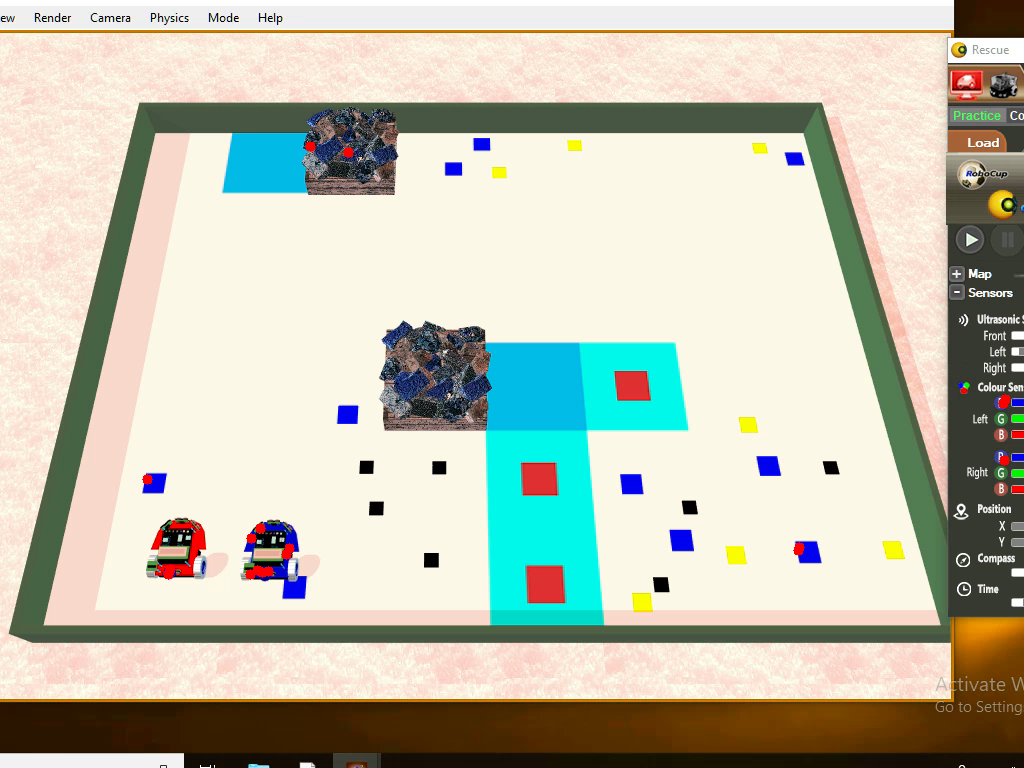

In [318]:
viz_box(frame,pp2)#[np.array(pp).mean(axis=0).astype(int)])

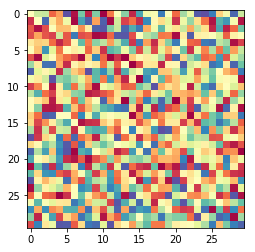

In [29]:
%matplotlib inline
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((30, 30))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
show()

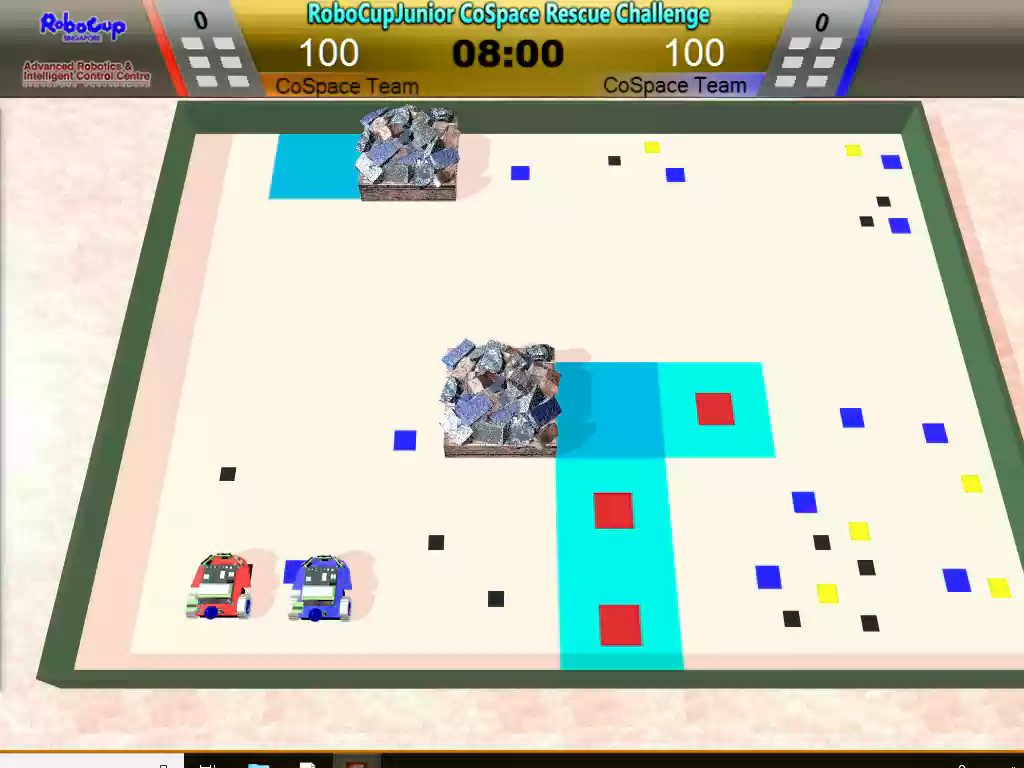

In [18]:
showarray(frame)

In [3]:
def showarray(a, fmt='png'):
    IPython.display.display(PIL.Image.fromarray(a))
    
def viz_box(src,cords,c=(255,0,0)):
    frame=src.copy()
    for i in cords:
        cv2.circle(frame,(i[0],i[1]), 5, c, -1)
    showarray(frame)
    
    
def get_color(frame,up,low):
    """
    Return Image mask of selected color range
    params:
        frame: opencv color src image
        up: [R,G,B] upper bound
        low: [R,G,B] Lower bound
    """
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #even though it says BGR treat it like RBG [r,g,b]
    upp_blue_Hsv=cv2.cvtColor(np.uint8([[up]]),cv2.COLOR_BGR2HSV).reshape(3,)
    low_blue_Hsv=cv2.cvtColor(np.uint8([[low]]),cv2.COLOR_BGR2HSV).reshape(3,)
    low_blue_Hsv[1]=60 # sets saturation

    mask = cv2.inRange(hsv, low_blue_Hsv, upp_blue_Hsv)

    res = cv2.bitwise_and(frame,frame,mask= mask) #apply mask
    return res,mask

def npwhere_toxyztupels(x,y,z):
    '''from np.where inices to x,y,z coordinates in the image'''
    
    if not (len(x)==len(y)==len(z)):
        raise ValueError("xyz MUST BE len(x)==len(y)==len(z)")
        
    r_tupels=[(x[i],y[i],z[i]) for i in range(len(x))]
    return r_tupels

def image_coordinates_to_ros(x,y):
    '''convert opencv/numpy image cooridnate frame to ROS cord frame (0,0) is bottom left'''
    return

def isWithinRange(x,y,r):
    if (x-y)>r or (y-x) >r:
        return False
    return True

def get_box_cords(frame,boxines_tolrance=7,box_min_area=50):
    ''' Get cordinates of objects 
    
        params:
         frame: numpy mask image of the desired object (returned by get_color()[1])
         boxines_tolrance: how much of a diff between w and h before we discard it as a triangle 
         box_min_area: min area of box
    '''
    r_ar=[]
    im2, contours, hierarchy = cv2.findContours(frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    i=0

    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        if not isWithinRange(w,h,boxines_tolrance) or cv2.contourArea(cnt)<box_min_area:
                continue
        #print("Object {0}:({1},{2}) w:{2} h:{3} ".format(i,x,y,w,h))
          
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        r_ar.append([cX,cY])
            
        i+=1
    return r_ar
